## 1. Regular Expressions

A regular expression describes a sequence of symbols and characters expressing a string or pattern to be searched for in a text. Regular expressions describe regular languages in formal language theory. They have the same expressive power as regular grammars and finite state automata. <br><br>
The table below shows basic regular expression meta-characters, including wildcards, ranges and closures.

In [1]:
import re

words = ["bat", "bet", "bit", "bot", "but", "cricket bat", "bitter lemon", "boot", "boat", "batman"]

#### 1.1 Provide a regular expression that matches "bat", "bet", "bit", "bot" and "but" but also "boot" and "boat".

In [2]:
# re.match() function will search the regular expression pattern and return the first occurrence.
# re.search() similar to match(), but search for all lines
# re.findall() function will search for “all” occurrences that match a given pattern.

# reference: https://docs.python.org/3/library/re.html

#hint: re.compile(...)
#hint: r"b[...]+t"
pattern = re.compile(r"b[aeiou]+t")

for w in words:
    t=re.search(pattern,w)
    if (t):
        print(t.group(0))
    else:
        print ("Not match '%s'" % w)

bat
bet
bit
bot
but
bat
bit
boot
boat
bat


#### 1.2. Modify the regular expression for 1.1 so that it matches also "batman" but not "cricket bat".

In [3]:
#hint: re.compile(...)
#hint: r"^b[...]+t"
pattern = re.compile(r"^b[aeiou]+t.*")

for w in words:
    t=re.search(pattern,w)
    if (t):
        print(t.group(0))
    else:
        print ("Not match '%s'" % w)

bat
bet
bit
bot
but
Not match 'cricket bat'
bitter lemon
boot
boat
batman


##### 1.3. There exist a number of shorthand character classes: \d matches a single character that is a digit, \w matches a "word character" (alphanumeric characters plus underscore), and \s matches a whitespace character (includes tabs and line breaks). Provide the unabbreviated regular expressions for these shorthands.

#### 1.4. Provide a regular expression that matches passwords that can contain 6 to 18 letters, numbers, underscores, or hyphens, for example: my_p8ssw0rd.

In [4]:
passwords = ['my_p8ss-w0rd', 'my_p8ss-w0rdmy_p8ss-w0rdmy_p8ss-w0rd' , 'aaaaaaaaaaa', '22222222222','22222', '____________', '$asd123_']

#pattern = re.compile(r"^[a-z0-9_-]{6,18}$")
pattern = re.compile(r"^[a-z0-9_-]{6,18}$")

for pwd in passwords:
	t=re.match(pattern,pwd)
	if (t):
		print(t.group(0))
	else:
	    print ("Not match \"%s\"" % pwd)

my_p8ss-w0rd
Not match "my_p8ss-w0rdmy_p8ss-w0rdmy_p8ss-w0rd"
aaaaaaaaaaa
22222222222
Not match "22222"
____________
Not match "$asd123_"


## 2. Tokenization

The [Project Gutenberg](https://www.gutenberg.org/)  is a volunteer effort to digitize and archive books online. These books are available in plain text and other formats. For example, you can access the plain text version of *The Picture of Dorian Gray*, by Oscar Wilde via the following URL:
http://www.gutenberg.org/cache/epub/174/pg174.txt. <br><br>
Write a Python program that fetches this book with the help of the <font color=red>urllib</font> library and displays the number of characters in the text, the first line of
the document, the number of tokens (= words and punctuation marks) in the document, and the first 20 of these tokens as follows:

In [3]:
from urllib import request
from nltk import word_tokenize
import nltk

nltk.download('punkt')

url = "http://www.gutenberg.org/cache/epub/174/pg174.txt"

response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')
print('Number of characters: ', len(raw))
print (raw)
print('First Line: ', raw[:75])

#hint: use the imported function word_tokenize()
tokens = word_tokenize(raw)
print('Number of tokens: ', len(tokens))
print('First 20 tokens: ', tokens[:20])

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of characters:  457527
The Project Gutenberg eBook of The Picture of Dorian Gray
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Picture of Dorian Gray

Author: Oscar Wilde

Release date: October 1, 1994 [eBook #174]
                Most recently updated: February 3, 2022

Language: English

Credits: Judith Boss. HTML version by Al Haines.


*** START OF THE PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY ***




The Picture of Dorian Gray

by Oscar Wilde


Contents

 THE PREFACE
 CHAPTER I.
 CHAPTER II.
 CHAPTER III.
 CHAPTER IV.
 CHAPTER V.
 CHAPTER VI.
 CHAPTER VII.
 C

## 3. Context-free Grammar

#### 3.1. Write a a context-free grammar that produces for the sentence *The boys sees the girl with a telescope* the following two syntax trees:

Note that in the first interpretation the prepositional phrase (PP) is attached to the verb phrase (VP), but in the second intrpretation the prepositional phrase is attached to the noun phrase (NP) that occurs in object position of the sentence.
<br><br>
You can use the following scoffolding for your implementation:

In [7]:
# another example: https://coli-saar.github.io/cl20/notebooks/CFGs.html

import nltk

grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP
VP -> V NP | V NP PP
Det -> 'a' | 'The' | 'the'
N -> 'boy' | 'girl' | 'telescope'
V -> 'sees'
P -> 'with'
""")

sent = ['The', 'boy', 'sees', 'the', 'girl', 'with', 'a', 'telescope']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP (Det The) (N boy))
  (VP
    (V sees)
    (NP (Det the) (N girl))
    (PP (P with) (NP (Det a) (N telescope)))))
(S
  (NP (Det The) (N boy))
  (VP
    (V sees)
    (NP (Det the) (N girl) (PP (P with) (NP (Det a) (N telescope))))))


## 4. Pytorch and Convolutional Neural Networks (optional)

### 4.1 Pytoch (CPU) and d2l Install

Pytorch Introduction:<br>
https://www.nvidia.com/en-us/glossary/data-science/pytorch/

Pytorch Install:<br>
using Anaconda for environments management (https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)

Pytorch Install: <br>
https://pytorch.org/get-started/locally/

d2l Introduction: https://d2l.ai/index.html <br>
d2l Install: https://d2l.ai/chapter_installation/index.html <br>
&nbsp;&nbsp; pip install d2l==1.0.3

### 4.2 CNN(LeNet)
code source:
https://d2l.ai/chapter_convolutional-neural-networks/lenet.html

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.7 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 10.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.2
    Uninstalling matplotlib-3.8.2:
      Successfully uninstalled matplotlib-3.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages

In [2]:
!pip3 install torch torchvision torchaudio


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.9 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        # If it is, initialize the weights of the layer using Xavier uniform initialization
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        # Save hyperparameters like learning rate and number of classes
        self.save_hyperparameters()
        # Define the network architecture using nn.Sequential
        self.net = nn.Sequential(
            # First convolutional layer: 6 output channels, 5x5 kernel, padding of 2
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            # First average pooling layer: 2x2 kernel, stride of 2
            nn.AvgPool2d(kernel_size=2, stride=2),
            # Second convolutional layer: 16 output channels, 5x5 kernel
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            # Second average pooling layer: 2x2 kernel, stride of 2
            nn.AvgPool2d(kernel_size=2, stride=2),
            # Flatten the output from the convolutional layers
            nn.Flatten(),
            # First fully connected layer: 120 output units
            nn.LazyLinear(120), nn.Sigmoid(),
            # Second fully connected layer: 84 output units
            nn.LazyLinear(84), nn.Sigmoid(),
            # Output layer: number of units equal to the number of classes
            nn.LazyLinear(num_classes))

In [7]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    # Generate a random tensor with the specified shape
    X = torch.randn(*X_shape)
    # Iterate over each layer in the network
    for layer in self.net:
        # Pass the tensor through the current layer
        X = layer(X)
        # Print the class name of the layer and the shape of the output tensor
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

# Create an instance of the LeNet model
model = LeNet()
# Call the layer_summary method with an input shape of (1, 1, 28, 28)
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/Users/admin/anaconda3/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


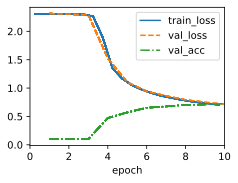

In [8]:
# Create a Trainer object with a maximum of 10 epochs and using 1 GPU
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# Load the FashionMNIST dataset with a batch size of 128
data = d2l.FashionMNIST(batch_size=128)

# Create an instance of the LeNet model with a learning rate of 0.1
model = LeNet(lr=0.1)

# Initialize the model parameters using the init_cnn function
# The initialization is done using a batch of data from the dataloader
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)

# Train the model using the trainer object and the loaded data
trainer.fit(model, data)

In [ ]:
#for more details, please refer to the code source:
#https://d2l.ai/chapter_convolutional-neural-networks/lenet.html